In [1]:
# %pip install pandas numpy scikit-learn

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib


In [2]:
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
data = pd.read_csv(url, sep='\t', header=None, names=['label','message'])

print("Shape:", data.shape)
data.head()


Shape: (5572, 2)


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
# Convert labels to binary: ham=0, spam=1
data['label_num'] = data['label'].map({'ham':0, 'spam':1})
data.head()


,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [4]:
X = data['message']
y = data['label_num']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [5]:
tfidf = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [6]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9704035874439462
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       1.00      0.78      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



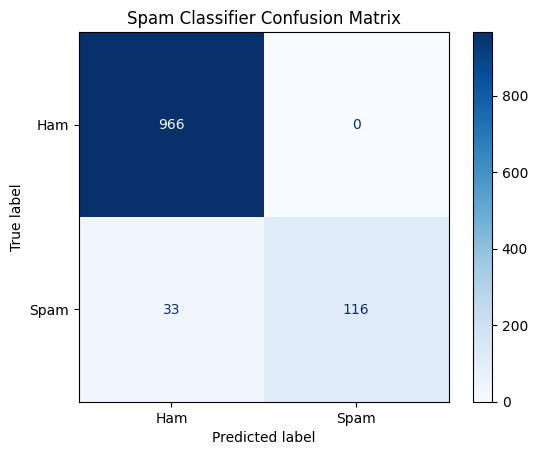

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                        display_labels=['Ham','Spam'],
                                        cmap='Blues')
plt.title("Spam Classifier Confusion Matrix")
plt.show()


In [8]:
joblib.dump(model, "spam_classifier.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")
print("✅ Model & vectorizer saved")


✅ Model & vectorizer saved


In [9]:
def predict_message(msg):
    msg_vect = tfidf.transform([msg])
    pred = model.predict(msg_vect)[0]
    return "Spam" if pred==1 else "Ham"

# Test
sample_msg = "Congratulations! You won a free iPhone. Call now!"
print("Message:", sample_msg)
print("Prediction:", predict_message(sample_msg))


Message: Congratulations! You won a free iPhone. Call now!
Prediction: Ham
